In [31]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re,string
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

import csv

In [32]:
Consumer_Key = "ee71LNIhBorkkXStapMD8Xf8a"
Consumer_Secret_Key = "CtimpCO2188bPm8Dx6j5eK43AbWJPnX8BJlIwO6irNJt1w2lmB"
Access_Token = "711763537971044353-ydboIEZFp6rvi7tT8Iqzx0odvr15ygt"
Access_Token_Secret = "YT5tehyL7rNqge2H992GAMHNEfWCcVBjf3J8UjrHq7SrC"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [33]:
csvFile = open('Gojek Indonesia.csv','a', encoding='utf-8')
csvWriter = csv.writer(csvFile)
for tweet in tweepy.Cursor(api.search, q= "#gojek",count=2000, 
                          lang='id').items(2000):
    print(tweet.text)
    csvWriter.writerow([tweet.text])


Kenyang tanpa masak ? #GoFood-in aja
Download #Gojek dan mulai #HidupTanpaBatas di Tomohon ##HidupTanpaBatas #GojekTomohon
Tokopedia dan Gojek dikabarkan akan melakukan merger.  Bila dua perusahaan startup ini bergabung diperkirakan nilai… https://t.co/YVd3mTmHaL
Anter barang tanpa repot ? #GoSend-in Aja, dan mulai #HidupTanpaBatas dengan #Gojek follow kita ya di GojekTomohon, kaka
Collab nya ga main main widiw

#kpop #Tokopedia #gojek #smtown #JYP https://t.co/kYE6VzyMav
Kirim orderan OL-shop lancar tanpa ribet ngantar, #GoSend solusinya. 
Download #Gojek dan mulai #HidupTanpa ##HidupTanpaBatas #GojekTomohon
Sidoli Pargojek (Sidoli Parmotor) | Artis Pemuda Batak Bersatu DPC Kab. Karimun | Cover Lagu Batak… https://t.co/EGIVtd1qXn
Kini Gojek telah hadir di Kota Tomohon, satu aplikasi untuk segala kebutuhanmu.
Download #Gojek dan mulai # ##HidupTanpaBatas #GojekTomohon
Pake #Go-Ride, lebih dekat dan lebih mudah
Download #Gojek, dan mulai #HidupTanpaBatas di Tomohon ##HidupTanpaBatas #Go

In [34]:
df = pd.read_csv("Gojek Indonesia.csv", header=None)
df

,0
0,RT @Syafira77264354: Udah Avail BO &amp; VCS ...
1,Udah Avail BO &amp; VCS !\nInclude/exclude yu...
2,PENIPU SEXX ONLINE PELECEHAN DAN PENCABULAN SI...
3,Apk Youtube Premium tanpa iklan gratiss: https...
4,"RT @GadisIdolanya: Ku termenung, dibawah menta..."
...,...
595,Kenyang tanpa masak ? #GoFood-in aja\nDownload...
596,Driver gojek lagi mlm tahun batuan\n\n#nanas #...
597,Makan tanpa masak ? #GoFood-in Aja Download #G...
598,Kirim orderan OL-shop lancar tanpa ribet ngant...


In [45]:

def praproses(teks):
    teks = re.sub(r'http\S+','',teks)
    teks = hapus_tanda(teks)
    teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('@[A-Za-z0-9]+', '',teks)  #hapus @
    teks = re.sub(r':([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('RT[\s]+', '',teks)#hapus RT
    teks = re.sub('https?:\/\/\S+', '',teks)#hapus hyperlink
    teks = re.sub(r'\w*\d\w*', '',teks).strip()#hapus angka dan angka yang berada dalam string
    teks = hapus_katadouble(teks)#hapus repetisi karakter
    teks = teks.lower() #ubah jadi lower case
    return teks
def hapus_emoji(teks):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',teks)
#     teks = to_kbbi(teks)
    

def hapus_tanda(teks): 
    tanda_baca = set(string.punctuation)
    tanda_baca.update(['…'])
    teks = ''.join(ch for ch in teks if ch not in tanda_baca)
    return teks

def hapus_katadouble(s): 
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)

def kbbi(kata): # penyeragaman kata berdasarkan kbbi 
	#kbba = [kamus.strip('\n').strip('\r') for kamus in open('kamus\\kbba.txt')]
	kamus_kata = [kamus.strip('\n').strip('\r') for kamus in open('kbba.txt')]
	#ubah list menjadi dictionary 
	dic = {}
	for i in kamus_kata: 
		(key, val) = i.split('\t')
		dic[str(key)] = val
	#kbbi cocokan 
	final_string = ' '.join(str(dic.get(word, word)) for word in kata).split()
	return final_string

def to_kbbi(teks):
    tek = teks.split()
    tek = kbbi(tek)
    return tek

#Removing the noisy text
def cleanText(text):
    text = remove_stopwords(text)
    text = praproses(text)
    return text

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop_w:
            final_text.append(i.strip())
    return " ".join(final_text)
    
    

# Load stopword Bahasa Indonesia
stopword_id = pd.read_csv('stopword_id.csv', sep='\t', header=None)
stopword_id.columns = ['word']
stop_w = stopword_id['word'].to_list() #diubah ke list 
# print('ada' in stop_w) # test periksa kata di dalam list stop_w

# def cleanText(teks):
#     teks = re.sub('@[A-Za-z0-9]+', '',teks)  #hapus @
#     teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
#     teks = re.sub('RT[\s]+', '',teks)#hapus RT
#     teks = re.sub('https?:\/\/\S+', '',teks)#hapus hyperlink
#     teks = teks.lower() #ubah jadi lower case
#     teks = re.sub(r"[-()\"#/@;:<>{}=~|.?,]", "", teks)
#     import string
#     killpunctuation = str.maketrans('', '', string.punctuation)
#     return teks

#Apply function on review column
df[0] = df[0].apply(cleanText)

df

,0,Polarity,Subjectivity,Analysis
0,udah avail bo amp vcs includeexclude yuk isi s...,0.0,0.0,Neutral
1,udah avail bo amp vcs includeexclude yuk isi s...,0.0,0.0,Neutral
2,penipu sexx online pelecehan pencabulan siswi ...,0.0,0.0,Neutral
3,apk youtube premium iklan gratiss youtubedown,0.0,0.0,Neutral
4,gadisidolanya ku termenung dibawah mentari😍😍 g...,0.0,0.0,Neutral
...,...,...,...,...
595,kenyang masak gofoodin aja download gojek hidu...,0.0,0.0,Neutral
596,driver gojek mlm batuan nanas bakar kemana goj...,0.0,0.0,Neutral
597,makan masak gofoodin aja download gojek nikmat...,0.0,0.0,Neutral
598,kirim orderan olshop lancar ribet ngantar gose...,0.0,0.0,Neutral


In [36]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df['Polarity'] = df[0].apply(getPolarity)
df['Subjectivity'] = df[0].apply(getSubjectivity)

df

,0,Polarity,Subjectivity
0,udah avail bo amp vcs includeexclude yuk isi ...,0.0,0.0
1,udah avail bo amp vcs includeexclude yuk isi ...,0.0,0.0
2,penipu sexx online pelecehan pencabulan siswi ...,0.0,0.0
3,apk youtube premium iklan gratiss youtubedown,0.0,0.0
4,gadisidolanya ku termenung dibawah mentari😍😍 ...,0.0,0.0
...,...,...,...
595,kenyang masak gofoodin aja download gojek hid...,0.0,0.0
596,driver gojek mlm batuan nanas bakar kemana go...,0.0,0.0
597,makan masak gofoodin aja download gojek sekar...,0.0,0.0
598,kirim orderan olshop lancar ribet ngantar gose...,0.0,0.0


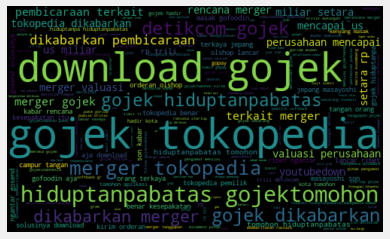

In [37]:
allWords =' '.join([twts for twts in df[0]])
wc = WordCloud(width = 500 , height = 300 , random_state=10, max_font_size=110).generate(allWords)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [38]:
#untuk menambahkan sentimen positif, negatif / netral dari polarity yg sudah dihitung
def getAnalysisSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
        
df['Analysis'] = df['Polarity'].apply(getAnalysisSentiment)

df

,0,Polarity,Subjectivity,Analysis
0,udah avail bo amp vcs includeexclude yuk isi ...,0.0,0.0,Neutral
1,udah avail bo amp vcs includeexclude yuk isi ...,0.0,0.0,Neutral
2,penipu sexx online pelecehan pencabulan siswi ...,0.0,0.0,Neutral
3,apk youtube premium iklan gratiss youtubedown,0.0,0.0,Neutral
4,gadisidolanya ku termenung dibawah mentari😍😍 ...,0.0,0.0,Neutral
...,...,...,...,...
595,kenyang masak gofoodin aja download gojek hid...,0.0,0.0,Neutral
596,driver gojek mlm batuan nanas bakar kemana go...,0.0,0.0,Neutral
597,makan masak gofoodin aja download gojek sekar...,0.0,0.0,Neutral
598,kirim orderan olshop lancar ribet ngantar gose...,0.0,0.0,Neutral


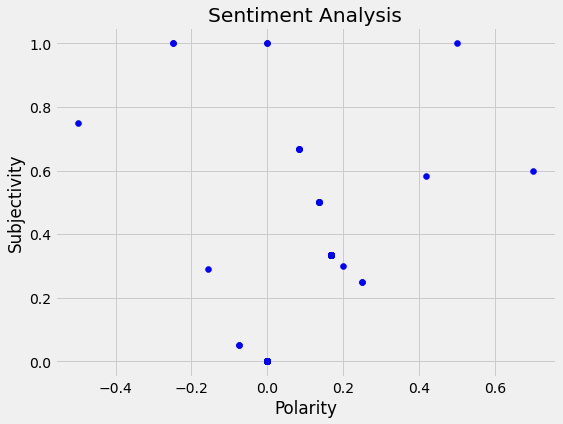

In [39]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Blue")
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [40]:
df['Analysis'].value_counts()

Neutral     554
Positive     40
Negative      6
Name: Analysis, dtype: int64

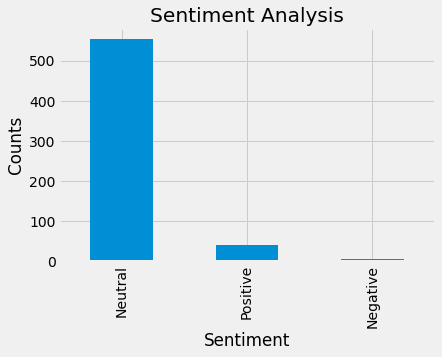

In [42]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind ='bar')
plt.show()